### Score:24

Q1.[8]

Q2.[8+8]

1. Global Earthquakes

C:\dev\anaconda3\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
C:\dev\anaconda3\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


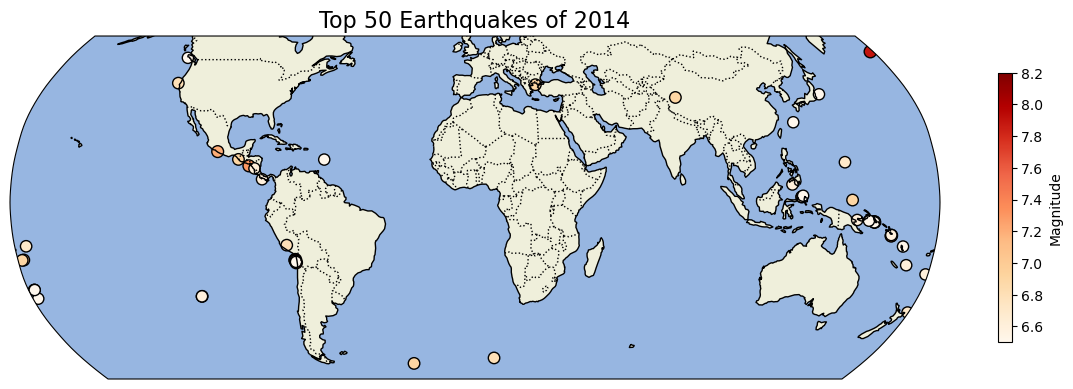

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 读取CSV文件
earthquakes = pd.read_csv(r'C:\Users\zjm\Desktop\ESE_5023\usgs_earthquakes.csv')

# 确保'time'列是日期时间格式
earthquakes['time'] = pd.to_datetime(earthquakes['time'])

# 过滤出2014年的数据
earthquakes_2014 = earthquakes[earthquakes['time'].dt.year == 2014]

# 按震级排序并获取前50个地震
earthquakes_top50 = earthquakes_2014.sort_values(by='mag', ascending=False).head(50)

# 创建一个图和轴对象
fig, ax = plt.subplots(figsize=(15, 7), subplot_kw={'projection': ccrs.Robinson()})

# 添加地理特征
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# 绘制地震数据
sizes = earthquakes_top50['mag'] * 10
colors = earthquakes_top50['mag']

# 绘制散点图，使用震级作为颜色和大小的依据
scatter = ax.scatter(earthquakes_top50['longitude'], earthquakes_top50['latitude'],
                    c=colors, s=sizes, cmap='OrRd', edgecolors='k', linewidth=1, transform=ccrs.PlateCarree())

# 添加颜色条
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', shrink=0.5)
cbar.set_label('Magnitude')

# 添加标题
ax.set_title('Top 50 Earthquakes of 2014', fontsize=16)

# 显示图形
# NOTE: 底图和投影中心应与例图一致 -2
plt.show()

首先，读取一个包含地震信息的CSV文件，并将时间列转换为日期时间格式。接着，筛选出2014年的数据，并按震级排序，取前50个地震。然后，创建一个地图，并添加陆地、海洋、海岸线和国界等地理特征。之后，根据地震的震级绘制散点图，震级越大，点越大，颜色越深。最后，添加颜色条以表示震级，并设置图表标题，然后显示地图。显示绘制完成的地图。

2.Explore a netCDF dataset

2.1

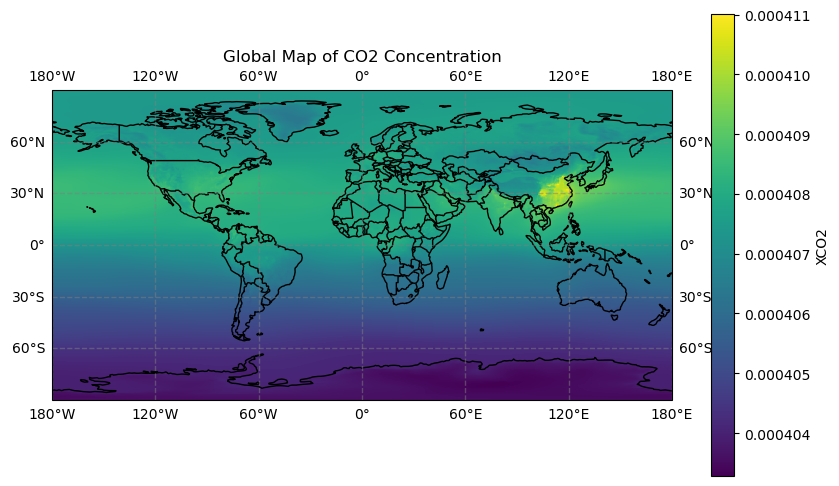

In [26]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# 打开NetCDF文件
ds = xr.open_dataset('oco2_GEOS_L3CO2_month_2015-2022.nc')

# 选择CO2浓度变量
co2_concentration = ds['XCO2']

# 计算时间平均
co2_mean = co2_concentration.mean(dim='time')

# 绘制全球映射
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.set_global()
co2_mean.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis', add_colorbar=True)
plt.title('Global Map of CO2 Concentration')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
# NOTE: 缺少注释和文本框 -2
plt.show()


首先，加载包含CO2浓度数据的NetCDF文件，并选择了XCO2变量，接着计算了整个时间序列的平均值以得到全球平均CO2浓度，创建一个以PlateCarree投影为基础的全球地图，添加海岸线和国界线，并使用pcolormesh方法将平均CO2浓度数据以颜色映射的形式展示出来，其中颜色条用于指示不同的CO2浓度水平，添加了网格线并格式化了经纬度标签，最后通过plt.show()函数将幅全球CO2浓度分布图呈现出来。

2.2

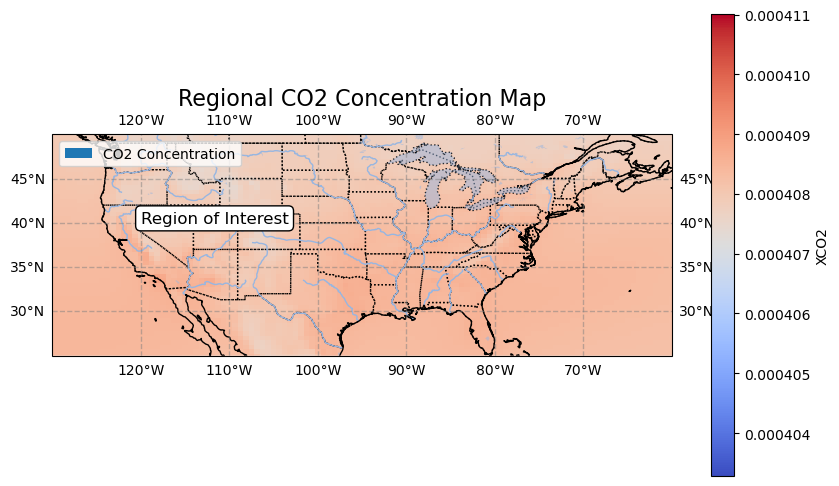

In [15]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


# 选择CO2浓度变量
co2_concentration = ds['XCO2']

# 计算时间平均
co2_mean = co2_concentration.mean(dim='time')

# 绘制区域图
plt.figure(figsize=(10, 6))
# NOTE: 应采用与2.1不同的投影方式 -1
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-130, -60, 25, 50], crs=ccrs.PlateCarree())  # 设置区域范围，例如北美

# 添加地理特征
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':')
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAKES, alpha=0.5)

# 绘制CO2数据
co2_mean.plot.pcolormesh(ax=ax, cmap='coolwarm', add_colorbar=True, transform=ccrs.PlateCarree())

# 添加标题和轴标签
ax.set_title('Regional CO2 Concentration Map', fontsize=16)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

# 添加网格线
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# 添加图例
plt.legend(['CO2 Concentration'], loc='upper left')

# 添加遮罩或要素
ax.coastlines()

# 添加注释和文本框
# NOTE: 这里仅添加了文本框 -1
ax.text(-120, 40, 'Region of Interest', transform=ccrs.Geodetic(), fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

plt.show()



展示特定区域（如北美）的二氧化碳(CO2)平均浓度分布，通过xarray库处理气候数据集，从中提取CO2浓度数据，计算时间平均值，然后使用matplotlib和cartopy库绘制区域地图，设置北美的经纬度范围，添加了国界、州界、河流和湖泊等地理特征，并通过pcolormesh方法以色彩映射的形式展示CO2浓度数据，其中颜色条表示不同的浓度水平，添加网格线和格式化的经纬度标签，设置了标题和轴标签，插入了图例和注释框，最后展示。